In [141]:
# Import necesary libraries
import yfinance as yf
import datetime as dt
from stocktrends import Renko

import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
import pandas as pd

from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY

from matplotlib.dates import date2num

In [142]:
# Download historical data for required stocks
ticker = "TSLA"  # TESLA
ohlcv = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [143]:
ohlcv

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-04,46.057999,46.891998,44.080002,44.512001,44.512001,43502500
2016-05-05,45.692001,45.728001,41.958000,42.306000,42.306000,56274000
2016-05-06,42.174000,43.273998,41.622002,42.986000,42.986000,28426000
2016-05-09,43.144001,43.230000,41.360001,41.784000,41.784000,23882000
2016-05-10,41.509998,41.894001,41.000000,41.737999,41.737999,20353000
...,...,...,...,...,...,...
2021-04-27,717.960022,724.000000,703.349976,704.739990,704.739990,29437000
2021-04-28,696.409973,708.500000,693.599976,694.400024,694.400024,22271000
2021-04-29,699.510010,702.250000,668.500000,677.000000,677.000000,28845400


In [144]:
def ATR(DF,n):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2

In [145]:
def renko_DF(DF):
    "function to convert ohlc data into renko bricks"
    df = DF.copy()
    df.reset_index(inplace=True)
    df = df.loc[:,["Date","Open","High","Low","Adj Close","Volume"]]
    df.rename(columns = {"Date" : "date", "High" : "high","Low" : "low", "Open" : "open","Adj Close" : "close", "Volume" : "volume"}, inplace = True)
    df2 = Renko(df)
    df2.brick_size = round(ATR(DF,120)["ATR"][-1],0)
    renko_df = df2.get_ohlc_data() #if using older version of the library please use get_bricks() instead
    return renko_df

In [146]:
renko_data = renko_DF(ohlcv)
renko_data

,date,open,high,low,close,uptrend
0,2016-05-04,0.0,38.0,0.0,38.0,True
1,2017-06-14,38.0,76.0,38.0,76.0,True
2,2020-01-23,76.0,114.0,76.0,114.0,True
3,2020-02-03,114.0,152.0,114.0,152.0,True
4,2020-03-18,114.0,114.0,76.0,76.0,False
5,2020-04-27,114.0,152.0,114.0,152.0,True
6,2020-06-10,152.0,190.0,152.0,190.0,True
7,2020-07-02,190.0,228.0,190.0,228.0,True
8,2020-07-06,228.0,266.0,228.0,266.0,True
9,2020-07-10,266.0,304.0,266.0,304.0,True


In [147]:
renko_data.set_index("date", inplace=True)
renko_data

,open,high,low,close,uptrend
date,,,,,
2016-05-04,0.0,38.0,0.0,38.0,True
2017-06-14,38.0,76.0,38.0,76.0,True
2020-01-23,76.0,114.0,76.0,114.0,True
2020-02-03,114.0,152.0,114.0,152.0,True
2020-03-18,114.0,114.0,76.0,76.0,False
2020-04-27,114.0,152.0,114.0,152.0,True
2020-06-10,152.0,190.0,152.0,190.0,True
2020-07-02,190.0,228.0,190.0,228.0,True
2020-07-06,228.0,266.0,228.0,266.0,True


<AxesSubplot:xlabel='Date'>

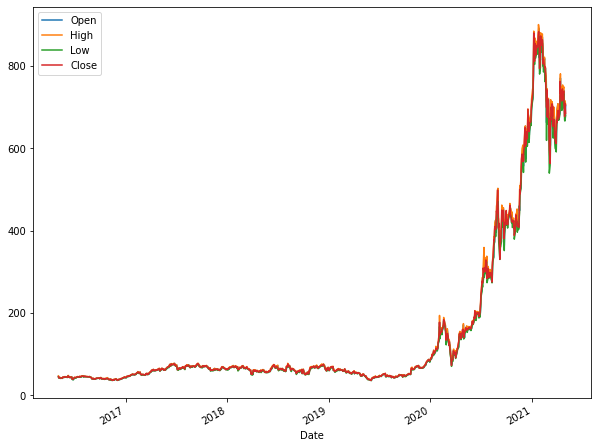

In [148]:
ohlcv.iloc[:,[0,1,2,3]].plot()

In [149]:
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()

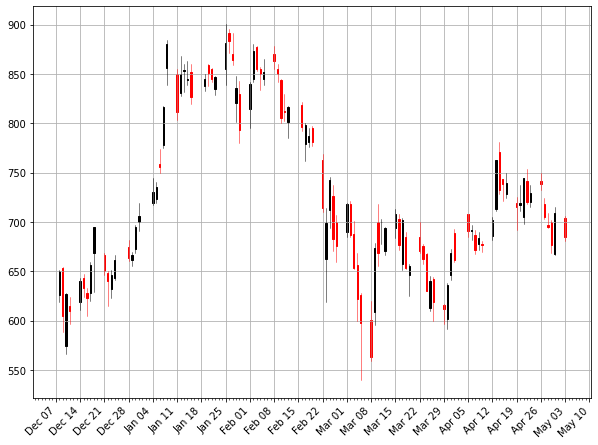

In [150]:
DF = ohlcv.iloc[-100:,[0,1,2,3]]
DF.columns = ['Open', 'High', 'Low', 'Close']
pandas_candlestick_ohlc(DF, stick="day")